<b>
<br>
<font size="5"><p style="text-align: center;">Introdução à Programação de Computadores</p></font>
<br>
<font size="5"><p style="text-align: center;">Atividade Interativa #10</p></font>
</b>
<br><br>
<font size="4"><b>Professores:</b>
<br>
Cristiano Rodrigues
<br>
Matheus Pereira
<br>
Jefersson A. dos Santos - jefersson@dcc.ufmg.br
<br><br>
</font>
<hr>
<br>
<font size="3">
</font>

# Estatísticas sobre gastos parlamentares 
------------------

# 1. Introdução

---------------

A Cota para o Exercício da Atividade Parlamentar – CEAP (antiga verba indenizatória) é uma cota única mensal destinada a custear os gastos dos deputados exclusivamente vinculados ao exercício da atividade parlamentar.

Nessa atividade prática você deverá implementar uma série de funções para geração de gráficos sobre os gastos parlamentares utilizando os dados publicamente disponíveis sobre as despesas do [CEAP](https://dadosabertos.camara.leg.br/swagger/api.html "Arquivos - Despesas pela Cota para Exercício da Atividade Parlamentar"). 


Você pode baixar os arquivos CSV do [site](https://dadosabertos.camara.leg.br/swagger/api.html) para a pasta **dados_parlamento** dentro do diretório onde se encontra o seu notebook (arquivo com extensão ipynb)

Não altere o nome dos arquivos:
* Ano-2009.csv
* Ano-2010.csv
* Ano-2011.csv
* Ano-2012.csv
* Ano-2013.csv
* Ano-2014.csv
* Ano-2015.csv
* Ano-2016.csv
* Ano-2017.csv

As suas funções para leitura dos arquivos devem utilizar caminhos relativos.<br>
Ou seja, para a leitura dos dados do arquivo Ano-2009.csv, por exemplo, o nome do arquivo passado para a função *open* deve ser "dados_parlamento/Ano-2009.csv". 

Não utilizar o caminho absoluto (por exemplo "C:\usuarios\m1011\documents\tp2\dados_parlamento\Ano-2009.csv") pois isso provavelmente impedirá que seu trabalho funcione em outra máquina além da sua.

# 2. O que deve ser feito
---------------

Para manipulação dos dados, você deverá implementar pelo menos (sendo permitida a implementação de outras funções, caso necessário):
<ol>
<li>Uma função para leitura dos dados. **Atenção:** (1) Observe que os dados estão codificados em formato UTF-8; (2) Observe que os arquivos são grandes. Talvez não seja uma boa ideia ler tudo e colocar em uma única lista. **FEITO!**</li>
<li>Uma função que retorna uma lista com os gastos totais da Câmara dos Deputados em um intervalo ('ano início' até 'ano fim').</li>
<li>Uma função que retorna uma lista com os gastos totais de todos os parlamentares em um ano específico.</li>
<li>Uma função que retorna os gastos médios totais dos parlamentares por partido para um ano específico.</li>
<li>Uma função que retorna os gastos médios totais dos parlamentares por estado para um ano específico.</li>
</ol>

As funções deverão ser utilizadas para plotar:
<ol>
<li>Um gráfico ilustrando a evolução dos gastos das cotas da Câmara dos Deputados entre 2009 e 2019.</li>
<li>Um histograma mostrando o total dos 20 parlamentares que mais gastaram em 2019.</li>
<li>Um histograma por partido, mostrando os gastos médios de seus parlamentares no ano de 2019.</li>
<li>Um histograma por estado, mostrando os gastos médios de seus parlamentares ano de 2019.</li>
</ol>

No final, você deverá utilizar os gráficos para responder as seguintes perguntas:
<ol>
<li>Houve alguma redução nos gastos com o CEAP nos últimos anos em que o país vive uma crise de arrecadação?</li>
<li>Quais os parlamentares mais caros no exercício de 2019?</li>
<li>Quais os partidos que, na média, mais "custam" para o Brasil em termos de auxílios a parlamentares?</li>
<li>Quais os estados, na média, mais "custam" para o Brasil em termos de auxílios a parlamentares? Pelas regras de liberação dos auxílios para viagem, o esperado é que os estados mais distantes do DF custem mais. </li>
</ol>




In [ ]:
# Criando a pasta
!mkdir dados_parlamentares

# Baixando os dados de 2019
!wget http://www.camara.leg.br/cotas/Ano-2019.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2018.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2017.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2016.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2015.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2014.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2013.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2012.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2011.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2010.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2009.csv.zip

!unzip Ano-2019.csv.zip
!unzip Ano-2018.csv.zip
!unzip Ano-2017.csv.zip
!unzip Ano-2016.csv.zip
!unzip Ano-2015.csv.zip
!unzip Ano-2014.csv.zip
!unzip Ano-2013.csv.zip
!unzip Ano-2012.csv.zip
!unzip Ano-2011.csv.zip
!unzip Ano-2010.csv.zip
!unzip Ano-2009.csv.zip

!mv *.csv dados_parlamentares/


In [3]:
# Funcao que le os dados de um arquivo CSV e retorna a lista de rótulos (nome das colunas) e os dados.
# Estamos levando em consideracao que todos os dados do arquivo cabem na memória do computador.
def le_dados(filename):
    # Abrindo o arquivo. 
    # Utilizamos o parametro 'encoding' para indicar que o arquivo possui uma codificacao especifica. 
    # Isso garante que os acentos e caracteres especiais sejam lidos adequadamente.
    #file = open(filename, 'r', encoding='ISO-8859-1')
    file = open(filename, 'r', encoding='UTF-8')
    
    # Criando uma lista vazia para armazenar todos os dados do arquivo
    dados = []
    
    # Para cada linha do arquivo, realizamos as seguintes operacoes: 
    # (1) removemos o caractere '\n' do final da linha
    # (2) substituimos as ',' por ';' para evitar problemas com a separacao da parte decimal de valores.
    # (3) removemos as aspas extras
    # (4) transformamos a linha em uma lista
    # (5) adicionamos a lista de itens na lista 'dados'
    for line in file:
        #dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
        dados.append(line.rstrip().replace('","','";"').split('";"'))
        dados[-1][0]=dados[-1][0].replace('"','')
        dados[-1][-1]=dados[-1][-1].replace('"','')
        
    # Separando a primeira linha do arquivo para uma lista separada de 'rotulos'
    rotulos = dados.pop(0)
    
    return rotulos, dados

############# BLOCO PRINCIPAL DO PROGRAMA #############
# Apenas um teste. Fique a vontade para alterar ou apagar esse trecho de código.
rotulos, dados = le_dados("dados_parlamentares/Ano-2019.csv")

print (rotulos, "\n")
print ("Nome do parlamentar: ", dados[0][0])
print ("Número total de registros: %d\n" % (len(dados)))

['\ufefftxNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar', 'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota', 'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao', 'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento', 'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes', 'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote', 'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento', 'urlDocumento'] 

Nome do parlamentar:  LID.GOV-CD
Número total de registros: 289399



In [17]:
# Uma função que retorna uma lista com os gastos totais de todos
# os parlamentares em um ano específico.
# nome do parlamentar -> gastou
def gasto_total_ano(ano):
    rotulos, dados = le_dados("dados_parlamentares/Ano-"+ str(ano) +".csv")
    gastos_p = dict() #{}
    for linha in dados:
        nome = linha[0]
        gasto = float(linha[19])
        if nome in gastos_p:
            # adicionar
            gastos_p[nome] = gastos_p[nome] + gasto
        else:
            # criar
            gastos_p[nome] = gasto
    return gastos_p

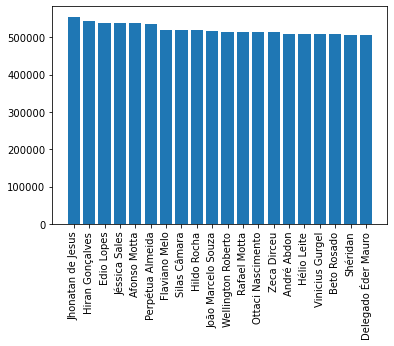

In [22]:
import matplotlib.pyplot as plt

def plot_mais_gastaram(ano):
    dicionario = gasto_total_ano(ano)
    invertida = []
    for chave, valor in dicionario.items():
        invertida.append((valor, chave))
    invertida.sort(reverse=True)
    mais_gastaram = invertida[:20]
    nomes = []
    valores = []
    for valor, nome in mais_gastaram:
        nomes.append(nome)
        valores.append(valor)
    plt.bar(nomes, valores)
    plt.xticks(rotation=90)

plot_mais_gastaram(2019)